In [1]:
# Author: Tree

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

# iris = datasets.load_iris()
# X = iris.data[:, :2]
# y = iris.target

# Controlled dataset
X, y = datasets.make_blobs(n_samples=100,\
                           n_features=2,\
                           centers=2,\
                           cluster_std=2,\
                           center_box=(-18, 18),\
                           random_state=1234)


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 10, x.max() + 10
    y_min, y_max = y.min() - 10, y.max() + 10
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy




def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



<IPython.core.display.Javascript object>


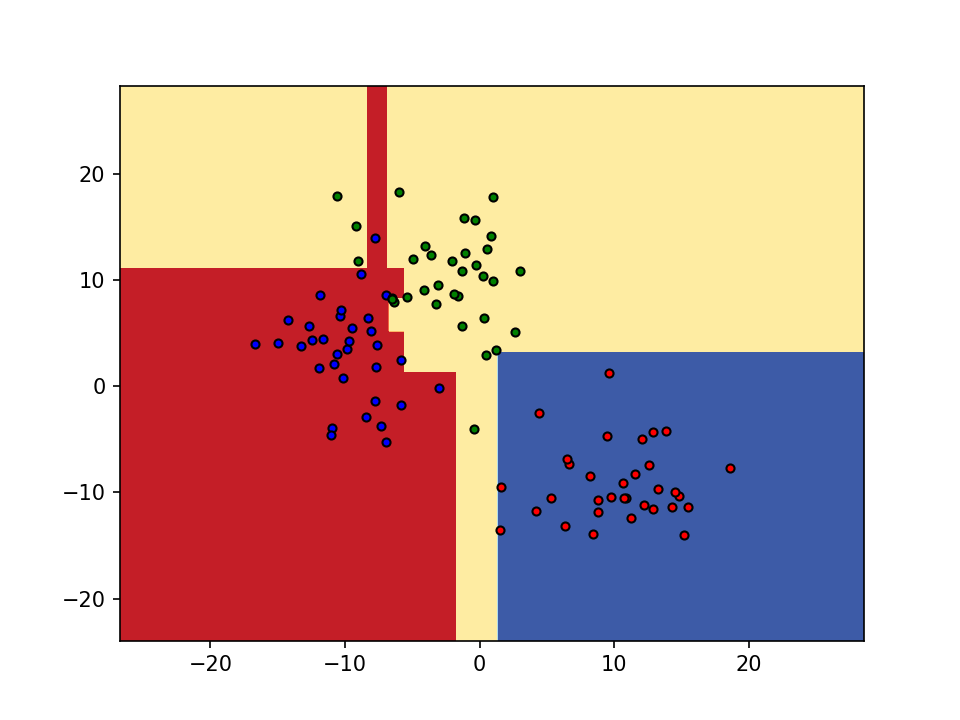

interactive(children=(Dropdown(description='centers', index=1, options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=2), …

<function __main__.update(centers=2, cluster_std=2, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None)>

In [5]:
%matplotlib notebook
# Model
dt = DecisionTreeClassifier()
dt.fit(X, y)

# Meshgrid
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Figure
fig, ax = plt.subplots(1, 1)
contours = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
points = ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')


def update(centers=2, cluster_std=2,\
           criterion='gini', max_depth=None,\
           min_samples_split=2, min_samples_leaf=1,\
           min_weight_fraction_leaf=0.0,\
           max_features=None,\
#            min_impurity_decrease=0.0, min_impurity_split=None,\
#            class_weight=None,\
#            presort=False,\
           ):
    
    X, y = datasets.make_blobs(n_samples=100,\
                               n_features=2,\
                               centers=centers,\
                               cluster_std=cluster_std,\
                               center_box=(-18, 18),\
                               random_state=1234)
    # Train
    dt = DecisionTreeClassifier(criterion='gini',\
                                splitter='best',\
                                max_depth=None,\
                                min_samples_split=2,\
                                min_samples_leaf=1,\
                                min_weight_fraction_leaf=0.0,\
                                max_features=None,\
                                random_state=None,\
                                max_leaf_nodes=None,\
                                min_impurity_decrease=0.0,\
                                min_impurity_split=None,\
                                class_weight=None,\
                                presort=False,\
                                ).fit(X, y)
    
    # Meshgrid
    x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
    y_min, y_max = X[:, 1].min() - 10, X[:, 1].max() + 10
    plot_step = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    # Predict
    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Draw contours and scatters
    contours.ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plot_colors = 'bgrcmykw'
    for i, color in zip(range(centers), plot_colors[:centers]):
        idx = np.where(y == i)
        ax.scatter(X[idx, 0], X[idx, 1], c=color, label=y[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    
    print('Finished training and predicting')
    
    
    
# Use function
interact(update,\
         centers=list(range(1,10)),\
         cluster_std=list(range(10)),\
         criterion=['gini', 'entropy'],\
         max_depth=[None]+list(range(1,15)),\
         min_samples_split=list(range(10)),\
         min_samples_leaf=list(range(10)),\
         min_weight_fraction_leaf=widgets.FloatSlider(min=0, max=1.0, step=0.02, value=0.0),\
         max_features=[None, 'auto', 'log2', 'sqrt']
        )

In [ ]:
points.